<a href="https://colab.research.google.com/github/Shwethaa-R/Deep-Learning-Activity-4/blob/main/VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16 Model using Data Augmentation, Batch Normalizaton and SGD Optimizer

Write a python code to implement the VGG 16 .

· Dataset as any image dataset but here you have to add the data augmentation (Eg: 10000 images then make as 15000 images using data augmentation scheme).

· Include batch normalization at the any place followed by first convolution

· Optimization SGD

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

The dataset is divided into 'train' and 'test' folders. It is a part of the MNIST dataset.
It has 10 classes, with each class having 100 images in each.

In [ ]:
# The path for training and validation data
path = '/content/drive/My Drive/Classification Dataset'
path_train = path + '/Train'
path_test = path + '/Test'
# Data augmentation on the training data
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, width_shift_range=5, height_shift_range=5 )
train = train_datagen.flow_from_directory(path_train, target_size=(224,224), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical')

Found 904 images belonging to 4 classes.
Found 221 images belonging to 4 classes.


In [ ]:
# Build the VGG16 model without a layer of Batch Normalization in between
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
# SGD Optimizer
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.0)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
# Fit the model with the chosen datset
hist = model.fit_generator(generator=train,epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
29/29 [==============================] - 20s 646ms/step - loss: 1.3726 - accuracy: 0.3152
Epoch 2/10
29/29 [==============================] - 19s 644ms/step - loss: 1.3721 - accuracy: 0.3112
Epoch 3/10
29/29 [==============================] - 19s 645ms/step - loss: 1.3687 - accuracy: 0.3020
Epoch 4/10
29/29 [==============================] - 19s 643ms/step - loss: 1.3499 - accuracy: 0.3191
Epoch 5/10
29/29 [==============================] - 19s 650ms/step - loss: 1.3330 - accuracy: 0.3990
Epoch 6/10
29/29 [==============================] - 19s 646ms/step - loss: 1.3073 - accuracy: 0.4239
Epoch 7/10
29/29 [==============================] - 19s 643ms/step - loss: 1.2628 - accuracy: 0.4568
Epoch 8/10
29/29 [==============================] - 19s 647ms/step - loss: 1.2134 - accuracy: 0.4297
Epoch 9/10
29/29 [==============================] - 19s 645ms/step - loss: 1.1873 - accuracy: 0.4852
Epoch 10/10
29/29 [==============================] - 19s 650ms/step - loss: 1.1465 - accura

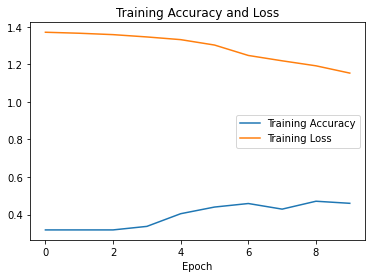

In [ ]:
# Plot the model accuracy and loss over 10 epochs
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['loss'])
plt.title("Training Accuracy and Loss")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy","Training Loss"])
plt.show()

In [ ]:
# Evaluate the model performance using the test dataset
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 50s 8s/step - loss: 1.1520 - accuracy: 0.4842
Loss = 1.1519702672958374
Test Accuracy = 0.4841628968715668


In [ ]:
# Build the VGG16 model with a layer of Batch Normalization after the second convolution layer
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
# SGD Optimizer
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)      

In [ ]:
# Fit the model with the chosen dataset
hist = model.fit_generator(generator=train,epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
29/29 [==============================] - 20s 645ms/step - loss: 1.3079 - accuracy: 0.2903
Epoch 2/10
29/29 [==============================] - 19s 667ms/step - loss: 1.3540 - accuracy: 0.3580
Epoch 3/10
29/29 [==============================] - 19s 648ms/step - loss: 1.0006 - accuracy: 0.5682
Epoch 4/10
29/29 [==============================] - 19s 651ms/step - loss: 0.8862 - accuracy: 0.5633
Epoch 5/10
29/29 [==============================] - 19s 649ms/step - loss: 0.9664 - accuracy: 0.5253
Epoch 6/10
29/29 [==============================] - 19s 650ms/step - loss: 0.7483 - accuracy: 0.6632
Epoch 7/10
29/29 [==============================] - 19s 668ms/step - loss: 0.8555 - accuracy: 0.5871
Epoch 8/10
29/29 [==============================] - 19s 650ms/step - loss: 0.6754 - accuracy: 0.7396
Epoch 9/10
29/29 [==============================] - 19s 652ms/step - loss: 0.5976 - accuracy: 0.7377
Epoch 10/10
29/29 [==============================] - 19s 660ms/step - loss: 0.6361 - accura

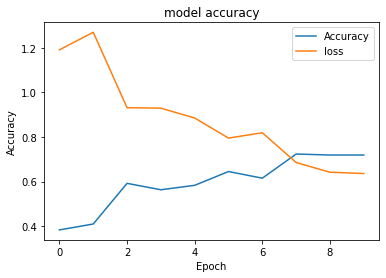

In [ ]:
# Plot the loss and accuracy of the model over 10 epochs 
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [ ]:
# Evaluate the model performance using the test dataset
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 1s 127ms/step - loss: 0.4585 - accuracy: 0.7466
Loss = 0.4584788978099823
Test Accuracy = 0.7466063499450684


After including Batch Normalization, there is a significant increase in the accuracy.